## Graphing and Plotting

**Import Dependencies**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
from citipy import citipy
from datetime import datetime
import csv

**Import CSV file**

In [2]:
final_df_csv = "totest1.csv"
final_df = pd.read_csv(final_df_csv, low_memory=False)
final_df.drop(['Unnamed: 0','Balls'],axis=1,inplace=True)

**Setting Jupyter Column and DataFrame Display**

In [3]:
pd.set_option("display.max_columns",30)
final_df.rename(columns={'Velocity2.1':'Velocity'}, inplace=True)
final_df.head()

,BreakAngle,Result,EndVelocity,Velocity,Nasty,TypeofPitch,Strike/Ball/X,Result2,L/RPitcher,L/RBatter,AwayTeam,Date,HomeTeam,StartTime,Stadium,Batter1,Batter2,Pitcher1,Pitcher2,Temp,Conditions,Wind_Speed(MPH)
0,-25.0,Strike,84.1,92.9,55.0,Fourseam Fastball,Strike,Groundout,L,L,St Louis Cardinals,2015-04-05,Chicago Cubs,7:17 PM,Wrigley Field,Matt,Carpenter,Jon,Lester,44,clear,7
1,-40.7,Strike,84.1,92.8,31.0,Fourseam Fastball,Strike,Groundout,L,L,St Louis Cardinals,2015-04-05,Chicago Cubs,7:17 PM,Wrigley Field,Matt,Carpenter,Jon,Lester,44,clear,7
2,-43.7,Strike,85.2,94.1,49.0,Fourseam Fastball,Strike,Groundout,L,L,St Louis Cardinals,2015-04-05,Chicago Cubs,7:17 PM,Wrigley Field,Matt,Carpenter,Jon,Lester,44,clear,7
3,-1.3,Ball,84.0,91.0,41.0,Fourseam Fastball,Ball,Groundout,L,L,St Louis Cardinals,2015-04-05,Chicago Cubs,7:17 PM,Wrigley Field,Matt,Carpenter,Jon,Lester,44,clear,7
4,18.4,Ball,69.6,75.4,18.0,Curveball,Ball,Groundout,L,L,St Louis Cardinals,2015-04-05,Chicago Cubs,7:17 PM,Wrigley Field,Matt,Carpenter,Jon,Lester,44,clear,7


**Baseball Stadiums and Summary Statistics DataFrame**

In [4]:
stadium_summary = final_df.groupby(['Stadium']).mean().reset_index()

In [5]:
stadium_summary.dropna(subset=['BreakAngle'], inplace = True)

In [6]:
stadium_summary.sort_values(['Velocity'],ascending=False,inplace=True)

*Top 5 Stadiums by Velocity*

In [7]:
stadium_summary.head()

,Stadium,BreakAngle,EndVelocity,Velocity,Nasty,Temp,Wind_Speed(MPH)
26,PNC Park,6.176552,82.416013,89.354096,44.629682,73.296265,8.099304
6,Citi Field,10.152064,81.644156,89.098970,44.456457,73.000601,10.708545
15,Great American Ball Park,7.108426,82.069230,88.939824,44.481510,75.218376,7.528466
9,Coors Field,0.256149,82.641305,88.915854,43.938058,74.325776,6.363465
22,Nationals Park,8.083450,81.753138,88.868912,44.375457,77.570662,6.845642


*Bottom 5 Stadiums by Velocity*

In [8]:
stadium_summary.tail()

,Stadium,BreakAngle,EndVelocity,Velocity,Nasty,Temp,Wind_Speed(MPH)
13,Fort Bragg Field,-4.467606,81.798592,87.679577,44.232394,81.000000,5.000000
2,Angel Stadium of Anaheim,5.402618,80.376960,87.582636,45.068171,74.075713,7.052295
21,Minute Maid Park,1.495942,80.287191,87.490020,44.334753,73.715714,1.486885
3,BB&T Ballpark,4.990458,79.875954,87.395420,42.156489,74.000000,5.000000
23,O.co Coliseum,1.371137,80.852032,87.035457,45.667081,65.174504,11.126538


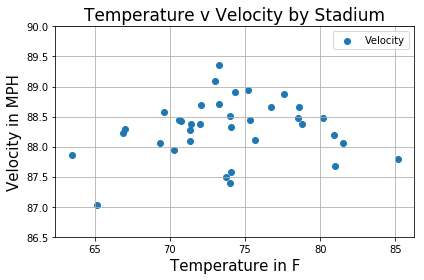

In [9]:
x= stadium_summary['Wind_Speed(MPH)']
y= stadium_summary['Velocity']
z= stadium_summary['BreakAngle']
w= stadium_summary['Nasty']
v= stadium_summary['Temp']

plt.scatter(v,y)
plt.ylim(86.5,90)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.ylabel('Velocity in MPH', fontsize = 15) #for y label
plt.xlabel('Temperature in F', fontsize = 15) #for x label
plt.title('Temperature v Velocity by Stadium',fontsize =17)
plt.tight_layout()
plt.savefig("Temperature v Velocity (Stadium Averages).png")
plt.show()

*Using Seaborn Plots to Determine Correlation - Very Helpful Utility*

In [10]:
import seaborn as sns

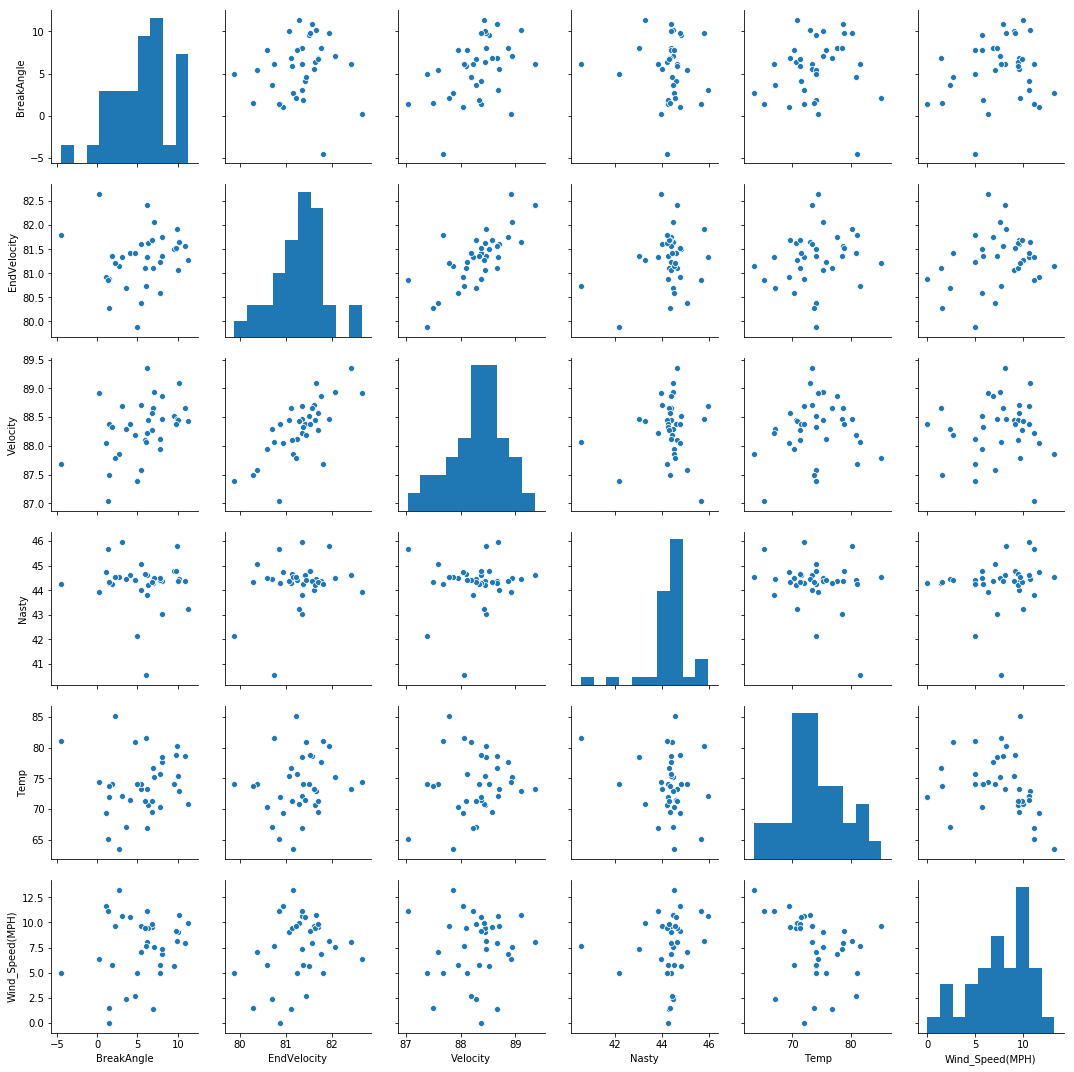

In [11]:
sns.pairplot(stadium_summary)
plt.savefig("Correlation Plot Stadium Summary.png")
plt.show()

*Splitting Columns*

In [12]:
new = final_df["Date"].str.split("-", n=2,expand=True)
final_df['year']=new[0]
final_df['month']=new[1]
final_df.head()

,BreakAngle,Result,EndVelocity,Velocity,Nasty,TypeofPitch,Strike/Ball/X,Result2,L/RPitcher,L/RBatter,AwayTeam,Date,HomeTeam,StartTime,Stadium,Batter1,Batter2,Pitcher1,Pitcher2,Temp,Conditions,Wind_Speed(MPH),year,month
0,-25.0,Strike,84.1,92.9,55.0,Fourseam Fastball,Strike,Groundout,L,L,St Louis Cardinals,2015-04-05,Chicago Cubs,7:17 PM,Wrigley Field,Matt,Carpenter,Jon,Lester,44,clear,7,2015,04
1,-40.7,Strike,84.1,92.8,31.0,Fourseam Fastball,Strike,Groundout,L,L,St Louis Cardinals,2015-04-05,Chicago Cubs,7:17 PM,Wrigley Field,Matt,Carpenter,Jon,Lester,44,clear,7,2015,04
2,-43.7,Strike,85.2,94.1,49.0,Fourseam Fastball,Strike,Groundout,L,L,St Louis Cardinals,2015-04-05,Chicago Cubs,7:17 PM,Wrigley Field,Matt,Carpenter,Jon,Lester,44,clear,7,2015,04
3,-1.3,Ball,84.0,91.0,41.0,Fourseam Fastball,Ball,Groundout,L,L,St Louis Cardinals,2015-04-05,Chicago Cubs,7:17 PM,Wrigley Field,Matt,Carpenter,Jon,Lester,44,clear,7,2015,04
4,18.4,Ball,69.6,75.4,18.0,Curveball,Ball,Groundout,L,L,St Louis Cardinals,2015-04-05,Chicago Cubs,7:17 PM,Wrigley Field,Matt,Carpenter,Jon,Lester,44,clear,7,2015,04


*Utilizing Groupby*

In [13]:
month_pitch = final_df.groupby(['TypeofPitch','month'])['Velocity','Temp'].mean()
month_pitch.head(10)

Velocity       Temp
TypeofPitch month                      
 Changeup   03     84.222834  63.506318
            04     83.705496  63.395240
            05     83.762150  69.644799
            06     83.871210  75.920810
            07     83.923849  79.298195
            08     83.815853  78.429137
            09     84.012091  74.879854
            10     83.368973  67.280060
 Curveball  03     78.122912  65.033860
            04     77.468976  63.109025

**Determining Seasonal Trends**

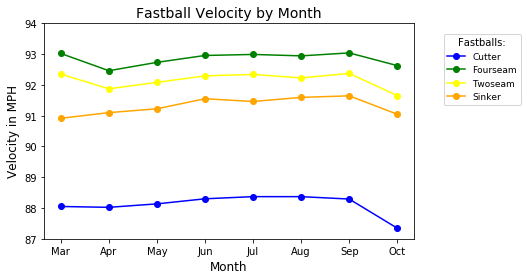

In [14]:
Cutter_df = month_pitch.loc[[' Cutter']].reset_index()
x=['Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']
a=Cutter_df['Velocity']
Fourseam_df = month_pitch.loc[[' Fourseam Fastball']].reset_index()
b=Fourseam_df['Velocity']
Twoseam_df = month_pitch.loc[[' Twoseam Fastball']].reset_index()
c=Twoseam_df['Velocity']
Sinker_df = month_pitch.loc[[' Sinker']].reset_index()
d=Sinker_df['Velocity']

plt.title('Fastball Velocity by Month',fontsize=14,fontweight=3)
plt.xlabel("Month",fontsize=12)
plt.ylabel("Velocity in MPH",fontsize=12)
plt.ylim(87,94)
plt.plot(x,a, marker='o',color='blue',label='Cutter')
plt.plot(x,b, marker='o',color='green',label='Fourseam')
plt.plot(x,c, marker='o',color='yellow',label='Twoseam')
plt.plot(x,d, marker='o',color='orange',label='Sinker')
plt.tight_layout()
plt.legend(loc=4,title="Fastballs:",fontsize=9,bbox_to_anchor=(1.3,0.6))
plt.savefig("Fastball Velocity by Month.png")
plt.show()

**Pitches by Month were Pretty Evenly Distributed**

In [15]:
pitch_result = final_df.groupby(['month','TypeofPitch'])['Strike/Ball/X'].count().reset_index()
pitch_result = pitch_result[pitch_result['TypeofPitch']!=' Intentional ball']
pitch_result = pitch_result[pitch_result['TypeofPitch']!=' Unknown']
pitch_result = pitch_result[pitch_result['TypeofPitch']!='FA']
pitch_result = pitch_result[pitch_result['TypeofPitch']!='AB']
pitch_result = pitch_result[pitch_result['TypeofPitch']!=' Pitchout']
pitch_result.head()

,month,TypeofPitch,Strike/Ball/X
0,03,Changeup,1108
1,03,Curveball,886
2,03,Cutter,579
3,03,Eephus,1
4,03,Fourseam Fastball,4151


In [16]:
pitch_result_sum = pitch_result.groupby(['month']).sum().reset_index()
pitch_result_sum

,month,Strike/Ball/X
0,03,11684
1,04,418059
2,05,491972
3,06,474206
4,07,442394
5,08,493728
6,09,483308
7,10,29912


**Determining Variability of Pitch Usage**

In [17]:
pitch_result = pd.merge(pitch_result,pitch_result_sum,how='inner',on='month')
pitch_result['Pitch_Ratio']=pitch_result['Strike/Ball/X_x']/pitch_result['Strike/Ball/X_y']*100

In [18]:
pitch_result = pitch_result[['month','TypeofPitch','Pitch_Ratio']]

In [19]:
pitch_o = pitch_result.groupby(['TypeofPitch','month']).sum().reset_index()
pitch_o['Pitch_Ratio']=round(pitch_o['Pitch_Ratio'],0)
pitch_pivot = pitch_o.pivot(index='TypeofPitch',columns='month',values='Pitch_Ratio')
pitch_pivot

month,03,04,05,06,07,08,09,10
TypeofPitch,,,,,,,,
Changeup,9.0,11.0,10.0,10.0,10.0,10.0,10.0,11.0
Curveball,8.0,8.0,8.0,8.0,8.0,9.0,9.0,9.0
Cutter,5.0,6.0,5.0,5.0,5.0,5.0,5.0,4.0
Eephus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
Fourseam Fastball,36.0,35.0,35.0,36.0,36.0,36.0,36.0,37.0
Knuckeball,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Knuckle curve,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0
Screwball,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN
Sinker,9.0,9.0,9.0,9.0,8.0,8.0,8.0,9.0


In [20]:
pitch_pivot.to_excel("Pitch Usage and Seasonality.xlsx")

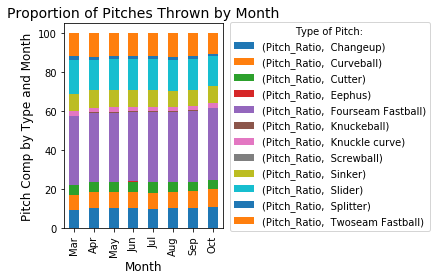

In [21]:
pitch_result.groupby(['month','TypeofPitch']).sum().unstack().plot(kind='bar',stacked=True)
plt.legend(title = 'Type of Pitch:',bbox_to_anchor=(1.01,1.03), ncol=1, fontsize=10)
plt.title('Proportion of Pitches Thrown by Month',fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Pitch Comp by Type and Month', fontsize=12)
Month=['Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']
plt.xticks(np.arange(8),('Mar','Apr','May','Jun','Jul','Aug','Sep','Oct'),rotation=90)

plt.tight_layout()
plt.savefig("Pitch Comp by Type and Month.png")
plt.show()

In [22]:
proportion_df = pitch_result.reset_index()
proportion_df= proportion_df.groupby(['TypeofPitch','month'])['Pitch_Ratio'].sum()

In [23]:
otherdf = proportion_df.reset_index()
proportion_df1 = list(otherdf['TypeofPitch'].unique())

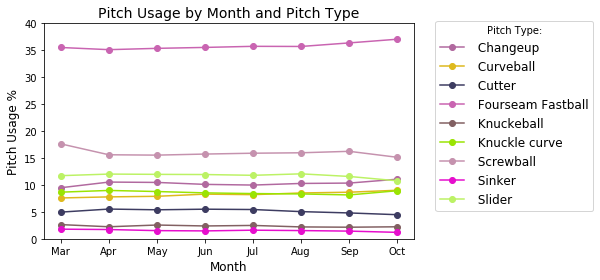

In [24]:
proportion_df1
date_list=['Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']

Changeup = proportion_df.loc[[' Changeup']].reset_index()
Curveball = proportion_df.loc[[' Curveball']].reset_index()
Cutter = proportion_df.loc[[' Cutter']].reset_index()
Eephus = proportion_df.loc[[ ' Eephus']].reset_index()
Fourseam = proportion_df.loc[[' Fourseam Fastball']].reset_index()
Knuckle = proportion_df.loc[[' Knuckle curve']].reset_index()
Sinker = proportion_df.loc[[' Sinker']].reset_index()
Slider = proportion_df.loc[[ ' Slider']].reset_index()
Splitter = proportion_df.loc[[' Splitter']].reset_index()
Twoseam = proportion_df.loc[[ ' Twoseam Fastball']].reset_index()
Knuckleball = proportion_df.loc[[ ' Knuckeball']].reset_index()
Screwball = proportion_df.loc[[' Screwball']].reset_index()

a=Changeup['Pitch_Ratio']
b=Curveball['Pitch_Ratio']
c=Cutter['Pitch_Ratio']
e=Fourseam['Pitch_Ratio']
f=Knuckle['Pitch_Ratio']
g=Sinker['Pitch_Ratio']
h=Slider['Pitch_Ratio']
i=Splitter['Pitch_Ratio']
j=Twoseam['Pitch_Ratio']

plt.title('Pitch Usage by Month and Pitch Type',fontsize=14,fontweight=3)
plt.xlabel("Month",fontsize=12)
plt.ylabel("Pitch Usage %",fontsize=12)
plt.ylim(0,40)
plt.plot(date_list,a, marker='o',color=np.random.random(3),label=proportion_df1[0])
plt.plot(date_list,b, marker='o',color=np.random.random(3),label=proportion_df1[1])
plt.plot(date_list,c, marker='o',color=np.random.random(3),label=proportion_df1[2])
plt.plot(date_list,e, marker='o',color=np.random.random(3),label=proportion_df1[4])
plt.plot(date_list,f, marker='o',color=np.random.random(3),label=proportion_df1[5])
plt.plot(date_list,g, marker='o',color=np.random.random(3),label=proportion_df1[6])
plt.plot(date_list,h, marker='o',color=np.random.random(3),label=proportion_df1[7])
plt.plot(date_list,i, marker='o',color=np.random.random(3),label=proportion_df1[8])
plt.plot(date_list,j, marker='o',color=np.random.random(3),label=proportion_df1[9])

plt.tight_layout()
plt.legend(loc=4,title="Pitch Type:",fontsize=12,bbox_to_anchor=(1.5,0.1))
plt.savefig("Pitch Usage by Type and Month.png")
plt.show()

Excluded from the plot due to lack of usage
    #d=Eephus['Pitch_Ratio']
    #k=Knuckleball['Pitch_Ratio']
    #l=Screwball['Pitch_Ratio']
    #plt.plot(date_list,d, marker='o',color=np.random.random(3),label=proportion_df1[3])
    #plt.plot(date_list,k, marker='o',color=np.random.random(3),label=proportion_df1[10])
    #plt.plot(date_list,l, marker='o',color=np.random.random(3),label=proportion_df1[11])

In [25]:
split1 = final_df["StartTime"].str.split(":", n=2,expand=True)
split2 = split1[1].str.split(" ", n=2,expand=True)

In [26]:
split1[0]=split1[0].astype(int)
final_df['StartTimeAdj'] = split2[1]+" "+split1[0].astype(str)
final_df.head()

,BreakAngle,Result,EndVelocity,Velocity,Nasty,TypeofPitch,Strike/Ball/X,Result2,L/RPitcher,L/RBatter,AwayTeam,Date,HomeTeam,StartTime,Stadium,Batter1,Batter2,Pitcher1,Pitcher2,Temp,Conditions,Wind_Speed(MPH),year,month,StartTimeAdj
0,-25.0,Strike,84.1,92.9,55.0,Fourseam Fastball,Strike,Groundout,L,L,St Louis Cardinals,2015-04-05,Chicago Cubs,7:17 PM,Wrigley Field,Matt,Carpenter,Jon,Lester,44,clear,7,2015,04,PM 7
1,-40.7,Strike,84.1,92.8,31.0,Fourseam Fastball,Strike,Groundout,L,L,St Louis Cardinals,2015-04-05,Chicago Cubs,7:17 PM,Wrigley Field,Matt,Carpenter,Jon,Lester,44,clear,7,2015,04,PM 7
2,-43.7,Strike,85.2,94.1,49.0,Fourseam Fastball,Strike,Groundout,L,L,St Louis Cardinals,2015-04-05,Chicago Cubs,7:17 PM,Wrigley Field,Matt,Carpenter,Jon,Lester,44,clear,7,2015,04,PM 7
3,-1.3,Ball,84.0,91.0,41.0,Fourseam Fastball,Ball,Groundout,L,L,St Louis Cardinals,2015-04-05,Chicago Cubs,7:17 PM,Wrigley Field,Matt,Carpenter,Jon,Lester,44,clear,7,2015,04,PM 7
4,18.4,Ball,69.6,75.4,18.0,Curveball,Ball,Groundout,L,L,St Louis Cardinals,2015-04-05,Chicago Cubs,7:17 PM,Wrigley Field,Matt,Carpenter,Jon,Lester,44,clear,7,2015,04,PM 7


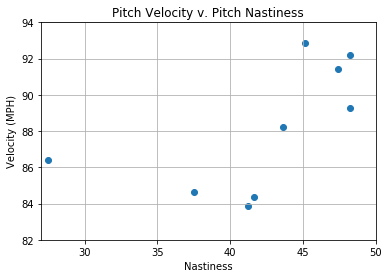

In [27]:
time_df=final_df.groupby(['TypeofPitch'])['Velocity','Nasty'].mean().reset_index().sort_values(['TypeofPitch','Nasty'])
time1=time_df
plt.scatter(time1['Nasty'],time1['Velocity'])
plt.ylim(82,94)
plt.xlim(27,50)
plt.title("Pitch Velocity v. Pitch Nastiness")
plt.xlabel("Nastiness")
plt.ylabel("Velocity (MPH)")
plt.grid()
plt.savefig("Pitch Velocity and Pitch Nastiness.png")
plt.show()
#time1

In [28]:
nastycorr = time1.corr(method ='pearson')
nastycorr

,Velocity,Nasty
Velocity,1.000000,0.531068
Nasty,0.531068,1.000000


In [29]:
nastycorr.to_csv("Nastiness.csv")